# API

## Library import

In [2]:
import os as os
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

## load the .env file variables

In [3]:
load_dotenv()
client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")

## Run commands for secret values

In [4]:
auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(auth_manager=auth_manager)

In [5]:
# ID del artista que proporcionaste
artist_id = '4dLvccxeQIM5u80Ri0u9OV'

In [6]:

# Función para obtener el top 10 de canciones
def get_top_tracks(artist_id, country='US'):
    results = sp.artist_top_tracks(artist_id, country=country)
    tracks = results['tracks'][:10]
    track_data = []
    for track in tracks:
        track_data.append({'Tracks': track['name'],
                           'Álbum': track['album']['name'],
                           'Popularidad': track['popularity'],
                           'duration_min': round(track['duration_ms'] / 60000, 2),
                           'URL': track['external_urls']['spotify']})
    return pd.DataFrame(track_data)

##  Show artist Top 10

In [7]:
tracks_data = get_top_tracks(artist_id)
tracks_data

,Tracks,Álbum,Popularidad,duration_min,URL
0,Tú Con El,"Cantándole al Amor, Vol. 2",77,5.02,https://open.spotify.com/track/6sRQjwLPdzADXhg...
1,Deseándote,Feliz Navidad Con Salsa,75,4.73,https://open.spotify.com/track/5hiHDuJOcBmB8wg...
2,Desnúdate Mujer,Feliz Navidad Con Salsa,74,4.83,https://open.spotify.com/track/7fuKGQRFnSZu4k1...
3,Tú Me Vuelves Loco,Feliz Navidad Con Salsa,69,4.95,https://open.spotify.com/track/64zAjhGj8t7iHtU...
4,Mi Libertad,Feliz Navidad Con Salsa,66,4.51,https://open.spotify.com/track/7m1ADUfi6v2cP40...
5,La Cura,Feliz Navidad Con Salsa,65,4.94,https://open.spotify.com/track/3HAjAfRtTyKxQAG...
6,La Rueda,Feliz Navidad Con Salsa,63,6.41,https://open.spotify.com/track/5xxR1xl7tiFlITt...
7,Esta Cobardía,Feliz Navidad Con Salsa,61,5.74,https://open.spotify.com/track/4qRJtJJ8LU2u3JP...
8,Quiero Llenarte,Feliz Navidad Con Salsa,61,4.53,https://open.spotify.com/track/45h6cHsy1LRc18k...
9,Si Te Entregas a Mi,Cantandole al Amor,58,4.99,https://open.spotify.com/track/7um9J27Um9yEn6G...


# Generate DataFrame

In [8]:
df_tracks = pd.DataFrame(tracks_data)
df_tracks

,Tracks,Álbum,Popularidad,duration_min,URL
0,Tú Con El,"Cantándole al Amor, Vol. 2",77,5.02,https://open.spotify.com/track/6sRQjwLPdzADXhg...
1,Deseándote,Feliz Navidad Con Salsa,75,4.73,https://open.spotify.com/track/5hiHDuJOcBmB8wg...
2,Desnúdate Mujer,Feliz Navidad Con Salsa,74,4.83,https://open.spotify.com/track/7fuKGQRFnSZu4k1...
3,Tú Me Vuelves Loco,Feliz Navidad Con Salsa,69,4.95,https://open.spotify.com/track/64zAjhGj8t7iHtU...
4,Mi Libertad,Feliz Navidad Con Salsa,66,4.51,https://open.spotify.com/track/7m1ADUfi6v2cP40...
5,La Cura,Feliz Navidad Con Salsa,65,4.94,https://open.spotify.com/track/3HAjAfRtTyKxQAG...
6,La Rueda,Feliz Navidad Con Salsa,63,6.41,https://open.spotify.com/track/5xxR1xl7tiFlITt...
7,Esta Cobardía,Feliz Navidad Con Salsa,61,5.74,https://open.spotify.com/track/4qRJtJJ8LU2u3JP...
8,Quiero Llenarte,Feliz Navidad Con Salsa,61,4.53,https://open.spotify.com/track/45h6cHsy1LRc18k...
9,Si Te Entregas a Mi,Cantandole al Amor,58,4.99,https://open.spotify.com/track/7um9J27Um9yEn6G...


# Image Visualization

Text(0, 0.5, 'Popularidad')

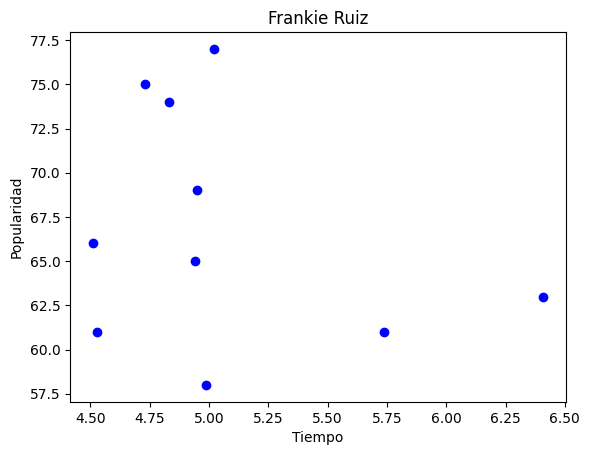

In [9]:
plt.scatter(df_tracks["duration_min"],
            df_tracks["Popularidad"],
            color='blue')
plt.title("Frankie Ruiz")
plt.xlabel("Tiempo")
plt.ylabel("Popularidad")